In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


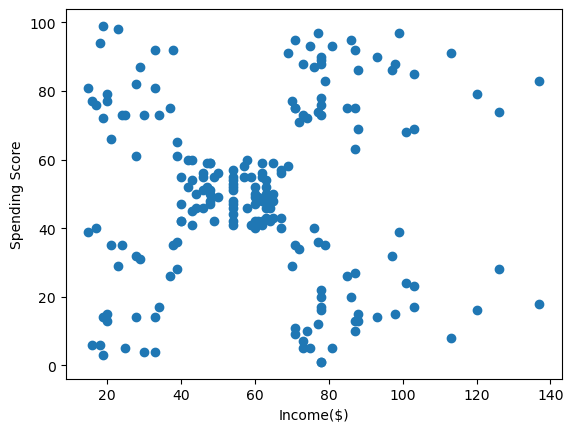

In [2]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Income($)')
plt.ylabel('Spending Score')
plt.show()

<font size='5'>Before applying the Elbow Method, we initially experimented with 5 clusters based on visual inspection and domain intuition. The distribution of the data suggested a possible segmentation into five groups.</font>

In [4]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_pred

C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [5]:
df['cluster']=y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


In [6]:
km.cluster_centers_

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

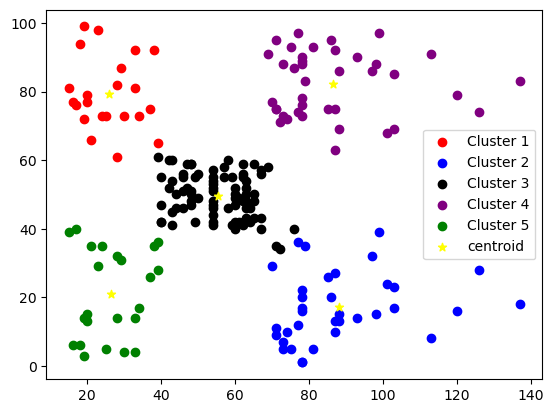

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red',label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black',label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple',label='Cluster 4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='green',label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.legend()
plt.show()

<font size='5'>Preprocessing using min max scaler</font>

In [9]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])

In [10]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,0
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,0
4,5,Female,31,0.016393,0.397959,4


In [11]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(df[['Annual Income (k$)', 'Spending Score (1-100)']])
y_pred

C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [12]:
df['cluster']=y_pred
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4


In [13]:
km.cluster_centers_

array([[0.59631148, 0.16921769],
       [0.32858607, 0.49706633],
       [0.58638083, 0.82783883],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

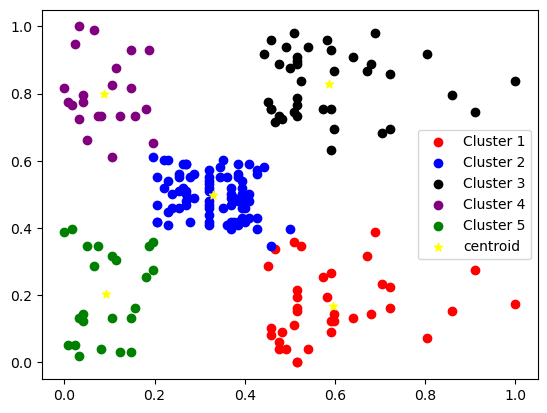

In [14]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
df4=df[df.cluster==3]
df5=df[df.cluster==4]

plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='red',label='Cluster 1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='blue',label='Cluster 2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black',label='Cluster 3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='purple',label='Cluster 4')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='green',label='Cluster 5')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',marker='*',label='centroid')
plt.legend()
plt.show()

In [15]:
labels_km=km.labels_

In [16]:
score = silhouette_score(df[['Annual Income (k$)', 'Spending Score (1-100)']], labels_km)
print("Silhouette Score:", score)

Silhouette Score: 0.558627081394975


In [17]:
WCSS=[]
k_mean=range(1,10)
for k in k_mean:
    km =KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    WCSS.append(km.inertia_)
    

C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\malak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

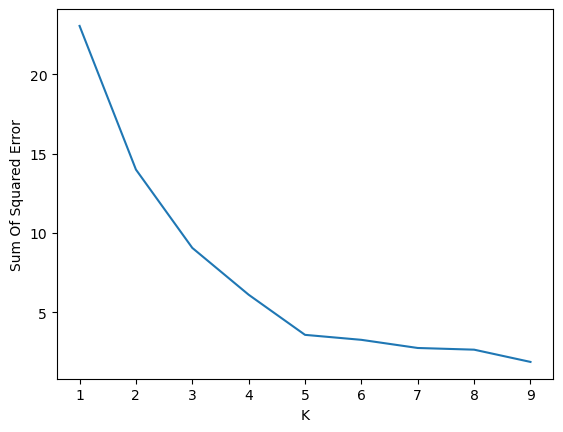

In [18]:
plt.xlabel('K')
plt.ylabel('Sum Of Squared Error')
plt.plot(k_mean,WCSS)

<font size='5'>The Elbow curve shows a noticeable inflection point at K = 5, suggesting that 5 clusters provide a good balance between model complexity and within-cluster variance.</font>

In [20]:
df.groupby('cluster')['Spending Score (1-100)'].mean()


cluster
0    0.169218
1    0.497066
2    0.827839
3    0.799629
4    0.203194
Name: Spending Score (1-100), dtype: float64

In [21]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]   

In [22]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [173]:
dbscan = DBSCAN(eps=0.09, min_samples=5)

In [175]:
dbscan.fit(X_scaled)

DBSCAN(eps=0.09)

<font size='5'>Multiple values of eps were tested for DBSCAN to optimize clustering performance based on silhouette score.</font>

In [177]:
labels = dbscan.labels_

In [179]:
print(set(labels))

{0, 1, 2, 3, 4, -1}


In [181]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters:", n_clusters)

Number of clusters: 5


In [183]:
if n_clusters > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, labels))

Silhouette Score: 0.47191877580515995


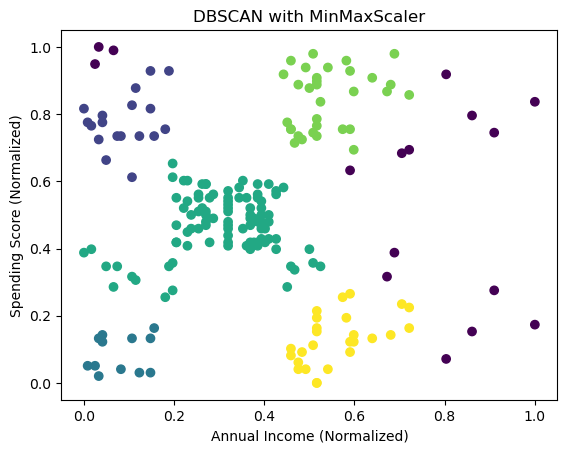

In [185]:
plt.figure()
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.title('DBSCAN with MinMaxScaler')
plt.xlabel('Annual Income (Normalized)')
plt.ylabel('Spending Score (Normalized)')
plt.show()

<font size='5'>The Silhouette Score of KMeans is higher than that of DBSCAN, indicating that KMeans produced more compact and well-separated clusters for this dataset.</font>